# <font size =10 color='black'> Example of calling direct auto corr without saving pc etc. This is handy if you want to include it within another script </font> 

In [1]:
from __future__ import print_function

#####importing the necessary libraries
#To make the plots inline otherwise it will make seperate figure
%matplotlib inline 
#for high resolution plot outputs
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pylab as pl
import fitsio as F
import sys
sys.path.insert(0,'../CorrelationFunction/')
# Direct calling the function
import General_FITS_selection as GFS
import ccorr_utility_nopc as corrnopc


In [2]:

def draw_circle(radius=1.0,color='r'):
    xx=np.linspace(0,radius,30)
    yy=np.sqrt(np.power(radius,2)-np.power(xx,2))
    
    pl.plot(xx,yy,'-',color=color)
    pl.plot(-xx,yy,'-',color=color)
    pl.plot(-xx,-yy,'-',color=color)
    pl.plot(xx,-yy,'-',color=color)
    
    return 0

In [11]:
def get_xi(rsd=False,njn=0):
    #set the parameters
    Lbox=250
    los=1
    pbc=1
    randfactor=2
    sampmode=1
    interactive=1
    
    datafile='../data/HOD_cat_model-bolshoi-ICTS-1.gcat'
    #Load the data
    data=np.loadtxt(datafile)
    #remove additional axis
    if(rsd):
        data[:,2]=np.mod(data[:,2]+(data[:,5]/100.0),Lbox)
    data=data[:,:4]
    #add weight as the 4th columns
    data[:,3]=1.0


    if(sampmode==1):
        samplim=np.array([0,30,-30,30])
        nbins=np.array([30,60])
    elif(sampmode==0):
        samplim=np.array([0,30,0,1])
        nbins=np.array([30,100])
    elif(sampmode==3):
        samplim=np.array([-1,1,-30,30])
        nbins=np.array([15,60])


    #Number of randoms
    nrand=randfactor*data.shape[0]
    # generate randoms uniformaly
    rand=GFS.randoms_fixedseed(data,nrand,Lbox)

    if(njn>0):
        #Add jackknife regions
        data,rand=GFS.add_pbc_jncol(data,rand,njn,los)

    sumwt_dic={}
    print('bef')
    data_c, rand_c, blen, POS_min, POS_max, sumwt_dic['SDwt'], sumwt_dic['SRwt']=GFS.prep_data_random_jn_wt(
        data,rand,njn=njn,los=los,pbc=pbc,interactive=interactive,outarr='c',
        datafile='array',randfile='array')
    print('aft')

    rlim_c =np.ascontiguousarray(np.array(samplim,dtype='double'))
    blen_c =np.ascontiguousarray(blen)
    pos_min_c=np.ascontiguousarray(POS_min)

    xi_dic=corrnopc.compute_auto(data_c, rand_c,rlim_c, nbins, blen_c, pos_min_c=pos_min_c,
            sampmode=sampmode, njn=njn, nproc=4, pbc=pbc, los=los,interactive=interactive,
                xi2droot='test2d_xx',xiprojroot='testproj_xx',sumwt_dic=sumwt_dic)

    #convert the xi2d in two matrix
    if(njn==0):
        xi_dic['xi2d']=np.transpose(xi_dic['xi2d'].reshape((xi_dic['rper'].size,xi_dic['rpar'].size)))
    else:
         xi_dic['xi2d']=np.transpose(xi_dic['xi2d'][:,0].reshape((xi_dic['rper'].size,xi_dic['rpar'].size)))

    return xi_dic


In [ ]:
# without rsd
xi_dic=get_xi(rsd=False)

# Make a plot

In [4]:
#xi_dic=xi_dic_tmp
#solutione to work 1 part 2
xi2d_full=np.column_stack([xi_dic['xi2d'][:,::-1],xi_dic['xi2d']])
rper_full=np.append(-xi_dic['rper'][::-1],xi_dic['rper'])

pl.figure(figsize=(15,10))
pl.pcolor(rper_full,xi_dic['rpar'],np.log10(xi2d_full))

#add color bar
pl.colorbar().set_label(label=r'$\xi(r_\perp,r_\parallel)$',size=22,weight='bold')

#make the contour plot
pl.contour(rper_full,xi_dic['rpar'],np.log10(xi2d_full),colors='k')

pl.ylabel(r'$r_\parallel$',fontsize=22)
pl.xlabel(r'$r_\perp$',fontsize=22)
pl.xlim([-30,30])
pl.ylim([-30,30])

pl.axis('equal')

draw_circle(radius=13.0,color='r') 

/var/folders/wx/vf61wc5j54302091j_cjd5y40000gn/T/ipykernel_10010/4151261343.py:7: RuntimeWarning: invalid value encountered in log10
  pl.pcolor(rper_full,xi_dic['rpar'],np.log10(xi2d_full))
/var/folders/wx/vf61wc5j54302091j_cjd5y40000gn/T/ipykernel_10010/4151261343.py:10: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  pl.colorbar().set_label(label=r'$\xi(r_\perp,r_\parallel)$',size=22,weight='bold')
/var/folders/wx/vf61wc5j54302091j_cjd5y40000gn/T/ipykernel_10010/4151261343.py:13: RuntimeWarning: invalid value encountered in log10
  pl.contour(rper_full,xi_dic['rpar'],np.log10(xi2d_full),colors='k')


0

# With rsd=True

In [7]:
xi_dic=get_xi(rsd=True)

bef
     39287 galaxies from array
     78574 randoms from array

Time:0 sec
aft
Updating nhocells to : 88, because ndata_min=39287

Workind on DD (. every 100k points):

Finished DD in 1 sec with 4 process and 39287 39287 particles, max scale    30.0000

Workind on DR (. every 100k points):

Finished DR in 3 sec with 4 process and 39287 78574 particles, max scale    30.0000

Workind on RR (. every 100k points):

Finished RR in 8 sec with 4 process and 78574 78574 particles, max scale    30.0000

Finished job in 8 sec with 4 process and nrand 78574 ,max scale    30.0000
written: test2d_xx-rp-pi-NJN-0.txt
written: testproj_xx-wp-rp-pi-NJN-0.txt


0

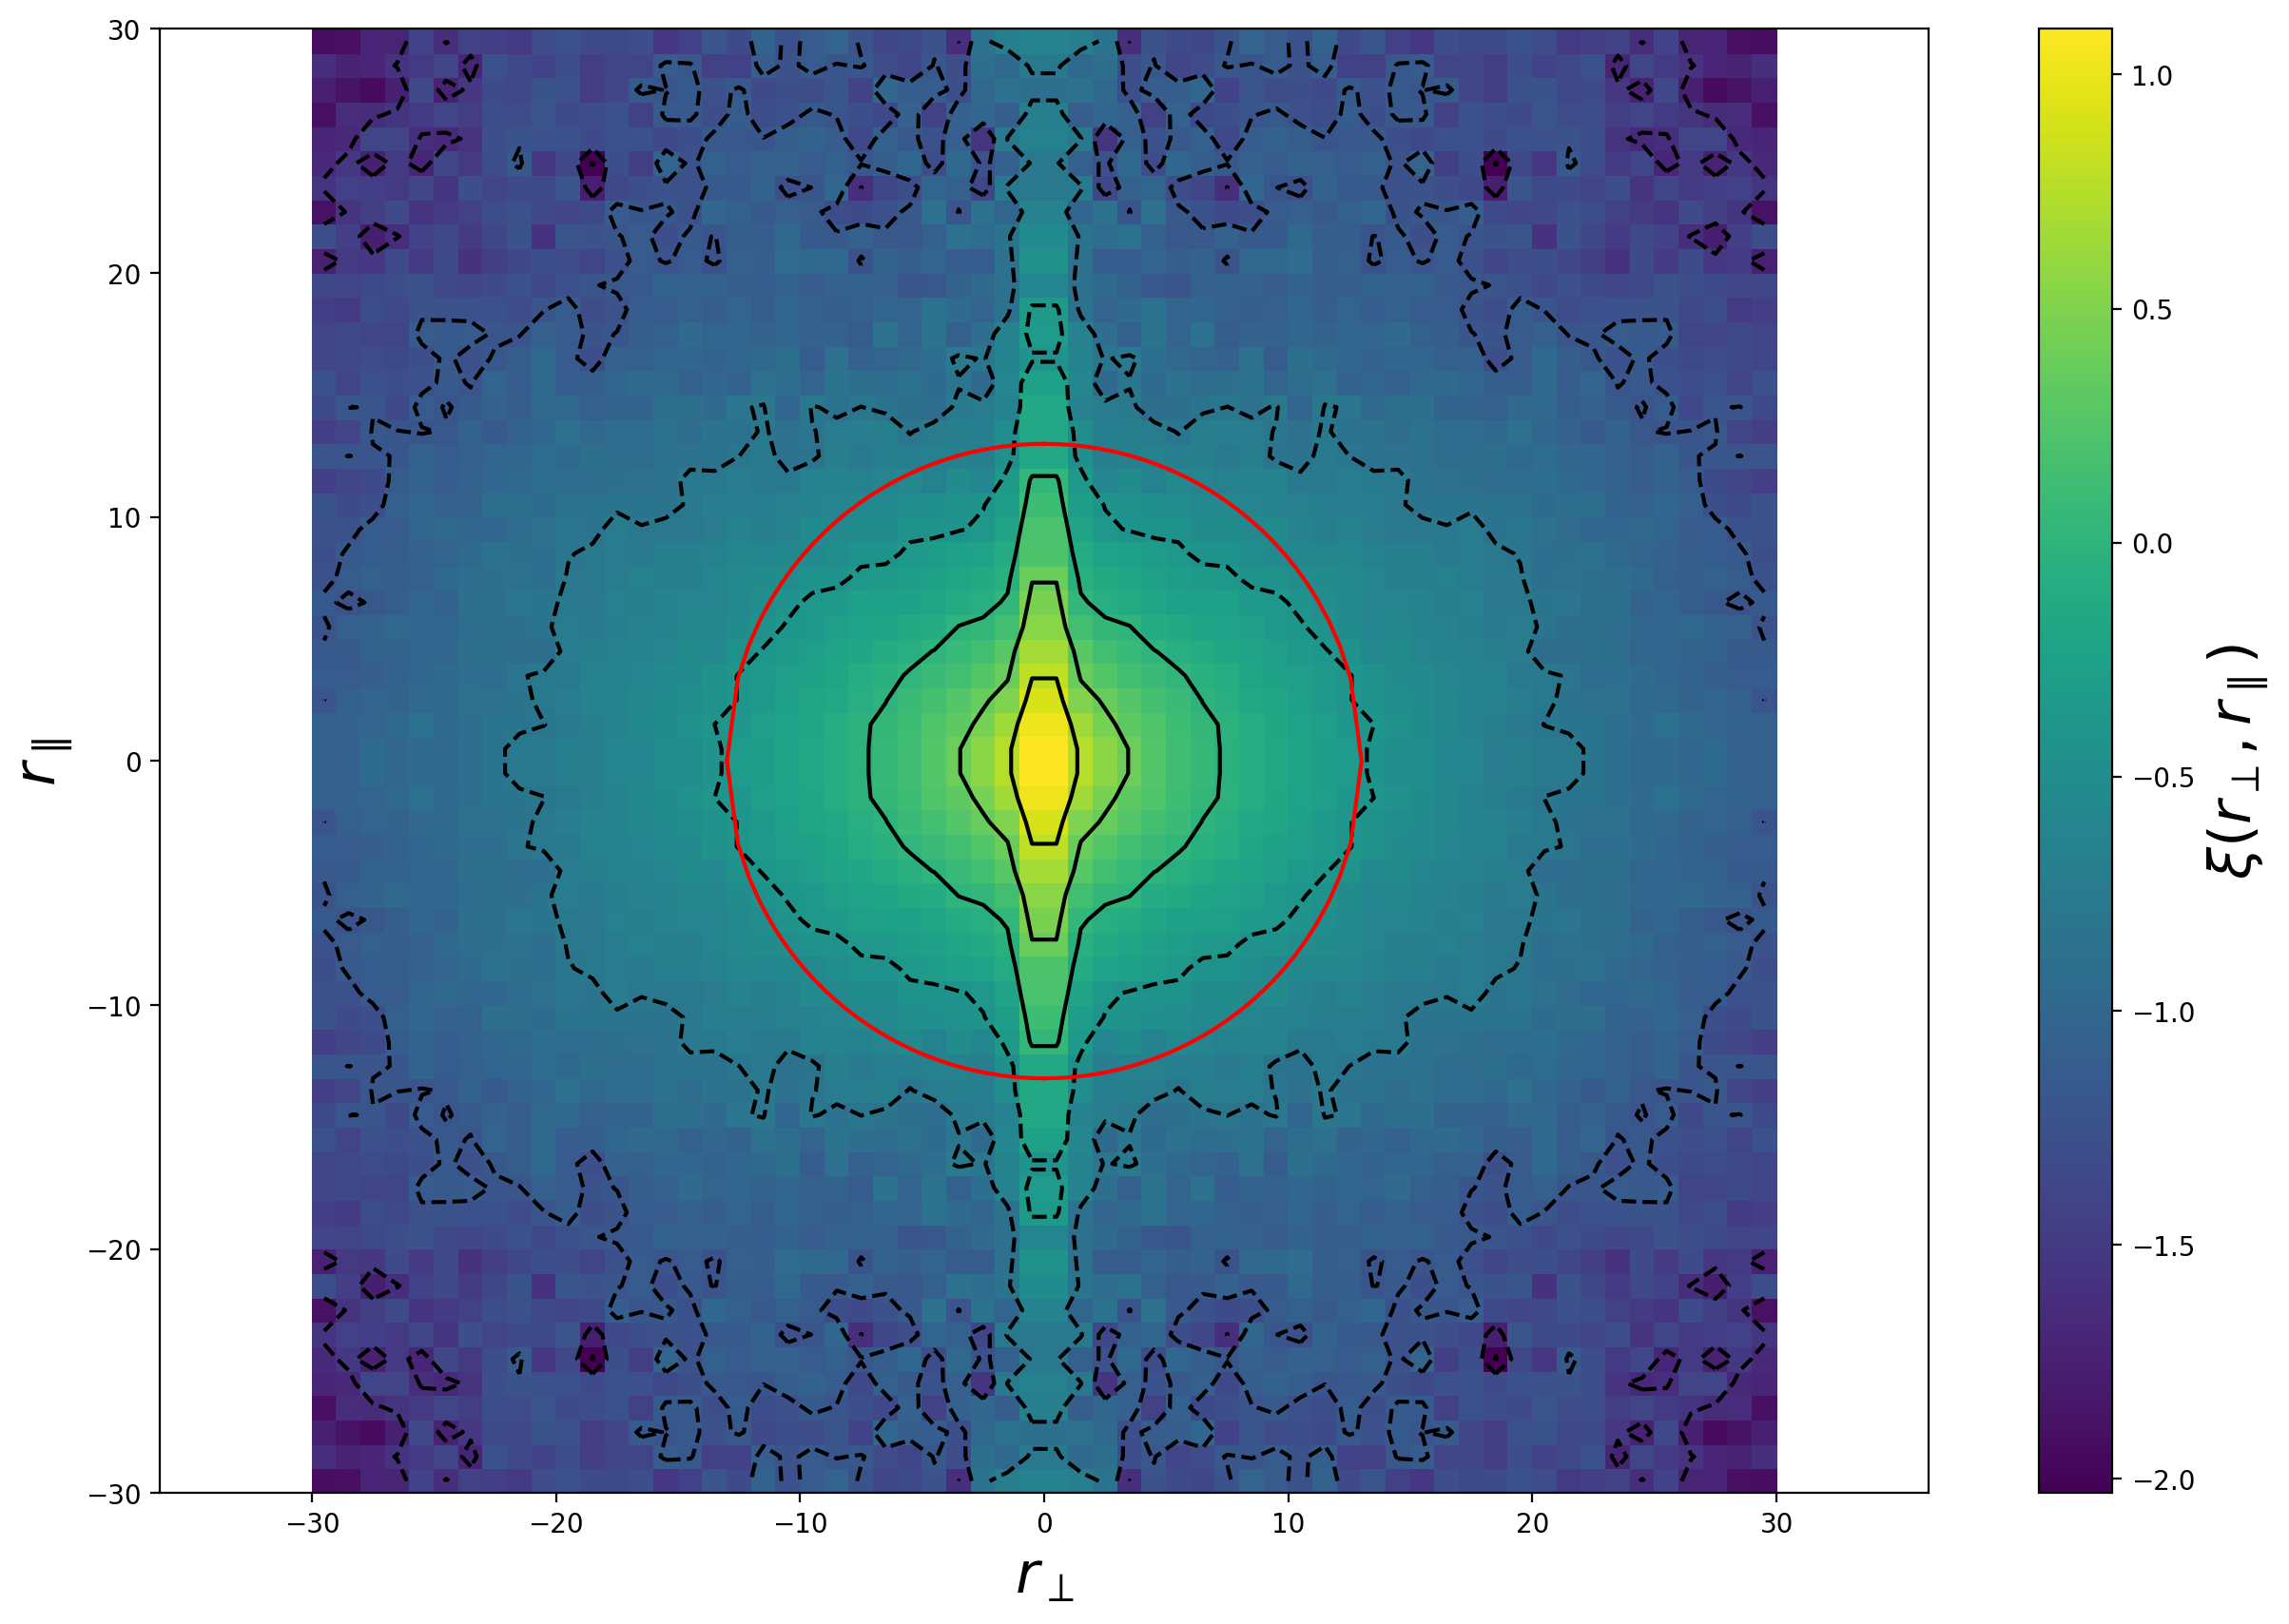

In [8]:
#xi_dic=xi_dic_tmp
#solutione to work 1 part 2
xi2d_full=np.column_stack([xi_dic['xi2d'][:,::-1],xi_dic['xi2d']])
rper_full=np.append(-xi_dic['rper'][::-1],xi_dic['rper'])

pl.figure(figsize=(15,10))
pl.pcolor(rper_full,xi_dic['rpar'],np.log10(xi2d_full))

#add color bar
pl.colorbar().set_label(label=r'$\xi(r_\perp,r_\parallel)$',size=22,weight='bold')

#make the contour plot
pl.contour(rper_full,xi_dic['rpar'],np.log10(xi2d_full),colors='k')

pl.ylabel(r'$r_\parallel$',fontsize=22)
pl.xlabel(r'$r_\perp$',fontsize=22)
pl.xlim([-30,30])
pl.ylim([-30,30])

pl.axis('equal')

draw_circle(radius=13.0,color='r')  

In [12]:
# With rsd and jn
xi_dic=get_xi(rsd=True,njn=100)

Using 2d Jacknife: 10 10
bef
     39287 galaxies from array
     78574 randoms from array

Time:0 sec
aft
Updating nhocells to : 88, because ndata_min=39287

Workind on DD (. every 100k points):

Finished DD in 1 sec with 4 process and 39287 39287 particles, max scale    30.0000

Workind on DR (. every 100k points):

Finished DR in 3 sec with 4 process and 39287 78574 particles, max scale    30.0000

Workind on RR (. every 100k points):

Finished RR in 9 sec with 4 process and 78574 78574 particles, max scale    30.0000

Finished job in 9 sec with 4 process and nrand 78574 ,max scale    30.0000
written: test2d_xx-rp-pi-NJN-100.txt
written: testproj_xx-wp-rp-pi-NJN-100.txt
..................